In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
filename = "cwk_data_lixsi12.csv"
file = pd.read_csv(filename)

X = file[file.columns[:-1]]
Y = file[file.columns[-1]]

print("Number of Datapoints:", X.shape[0])
print("Number of Input Features:", X.shape[1])

features = file.columns[0:15]

file.isnull().sum()

Number of Datapoints: 4000
Number of Input Features: 15


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [3]:
file.duplicated().sum()


243

In [4]:
file.head(10) 

age           job   marital  education default  balance housing loan  \
0   43    technician   married  secondary      no      328      no   no   
1   31   blue-collar   married  secondary      no     -204     yes  yes   
2   44  entrepreneur   married    primary      no      650     yes   no   
3   30   blue-collar   married  secondary      no      363     yes   no   
4   36    technician   married  secondary      no      432     yes   no   
5   45    technician  divorced  secondary      no      167      no   no   
6   48   blue-collar  divorced    primary      no       24     yes   no   
7   37   blue-collar   married  secondary      no      342     yes   no   
8   53    technician  divorced  secondary      no      392     yes   no   
9   59       unknown   married    unknown      no     3940      no   no   

    contact  day  duration  campaign  pdays  previous poutcome    y  
0  cellular   22        79         2     -1         0  unknown   no  
1  cellular   11       429         7     -1         0  unknown   no  
2  cellular    6       142         2     -1         0  unknown   no  
3  cellular    3       165         1     -1         0  unknown   no  
4  cellular   11        61         3    255         2  failure   no  
5  cellular   30        97        11     -1         0  unknown   no  
6   unknown   14       832         1     -1         0  unknown  yes  
7  cellular   12       340         2    175         1  failure   no  
8  cellular   28        70         1    245         1  failure   no  
9   unknown    5        48         2     -1         0  unknown   no

In [5]:
file_2=file.copy() #making a copy of the original file

In [6]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
file_2['job'] = labelencoder.fit_transform(file_2['job'])

file_2['marital'] = labelencoder.fit_transform(file_2['marital'])

file_2['education'] = labelencoder.fit_transform(file_2['education'])

file_2['default'] = labelencoder.fit_transform(file_2['default'])

file_2['housing'] = labelencoder.fit_transform(file_2['housing'])

file_2['loan'] = labelencoder.fit_transform(file_2['loan'])

file_2['contact'] = labelencoder.fit_transform(file_2['contact'])

file_2['poutcome'] = labelencoder.fit_transform(file_2['poutcome'])

file_2['y'] = labelencoder.fit_transform(file_2['y'])

file_2

age  job  marital  education  default  balance  housing  loan  contact  \
0      43    9        1          1        0      328        0     0        0   
1      31    1        1          1        0     -204        1     1        0   
2      44    2        1          0        0      650        1     0        0   
3      30    1        1          1        0      363        1     0        0   
4      36    9        1          1        0      432        1     0        0   
...   ...  ...      ...        ...      ...      ...      ...   ...      ...   
3995   57    7        0          0        0     1920        0     0        2   
3996   30    9        1          1        0      776        0     0        0   
3997   31    1        2          1        0        0        1     0        2   
3998   31    1        1          1        0     1407        1     0        0   
3999   32    4        2          2        0     3050        1     0        2   

      day  duration  campaign  pdays  previous  poutcome  y  
0      22        79         2     -1         0         3  0  
1      11       429         7     -1         0         3  0  
2       6       142         2     -1         0         3  0  
3       3       165         1     -1         0         3  0  
4      11        61         3    255         2         0  0  
...   ...       ...       ...    ...       ...       ... ..  
3995   19        77         2     -1         0         3  0  
3996   30       861         2     -1         0         3  1  
3997    6       273         2     -1         0         3  0  
3998    6       142         3     -1         0         3  0  
3999   23       298         1     -1         0         3  0  

[4000 rows x 16 columns]

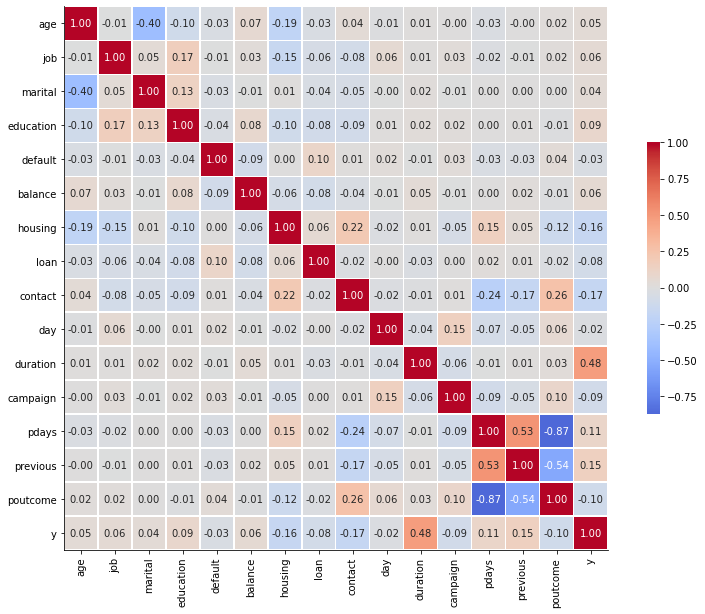

In [7]:
corr = file_2.corr()
g = sns.heatmap(corr,  vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
sns.despine()
g.figure.set_size_inches(14,10)

plt.show()

C:\Users\smsaz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\smsaz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\smsaz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\smsaz\anaconda3\lib\si

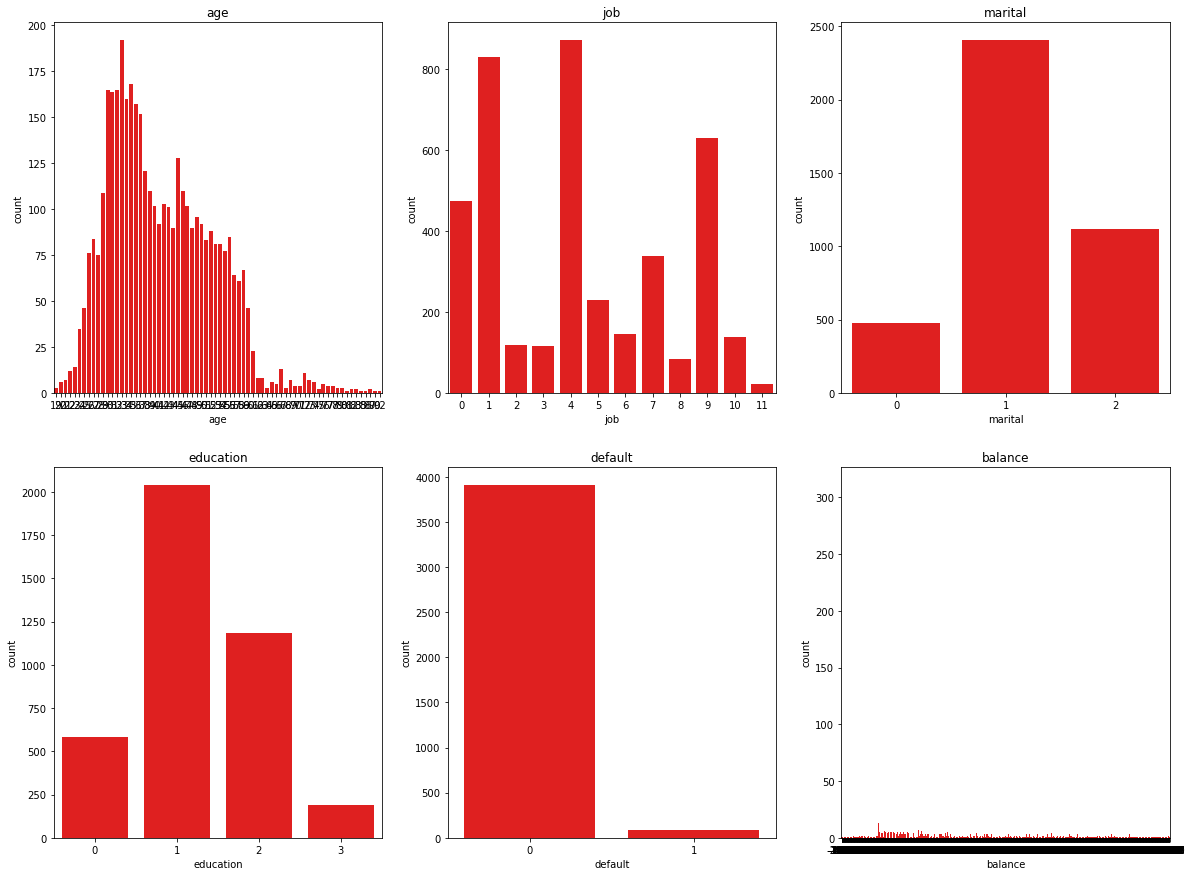

In [8]:
plt.rcParams['figure.figsize'] = (20.0, 15.0)


fig, axes = plt.subplots(ncols=3, nrows=2)

eatures):
   
    sns.countplot(file_2[col], ax=ax, color='red')
    

    ax.set_title(col)
plt.show()

In [9]:
# importing libraries
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 

In [10]:
feature_cols = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'duration', 'campaign', 'pdays', 'previous', 'poutcome' ]
X = file_2[feature_cols] 
y = file_2.y 

In [11]:
print(X)

      age  job  marital  education  default  balance  housing  loan  contact  \
0      43    9        1          1        0      328        0     0        0   
1      31    1        1          1        0     -204        1     1        0   
2      44    2        1          0        0      650        1     0        0   
3      30    1        1          1        0      363        1     0        0   
4      36    9        1          1        0      432        1     0        0   
...   ...  ...      ...        ...      ...      ...      ...   ...      ...   
3995   57    7        0          0        0     1920        0     0        2   
3996   30    9        1          1        0      776        0     0        0   
3997   31    1        2          1        0        0        1     0        2   
3998   31    1        1          1        0     1407        1     0        0   
3999   32    4        2          2        0     3050        1     0        2   

      day  duration  campaign  pdays  p

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 80% training and 20% test

In [13]:
clf = DecisionTreeClassifier()

clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

In [14]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.82125


In [15]:
conda install graphviz

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [16]:
import os

os.environ["PATH"]=os.environ["PATH"]+";"+os.environ["CONDA_PREFIX"]+r"\Library\bin\graphviz"

In [17]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus
import six
import sys
sys.modules['sklearn.externals.six'] = six

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

In [18]:
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.006)
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.006, random_state=0)

In [19]:
pred=clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.84375

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
file.head()

age           job  marital  education default  balance housing loan  \
0   43    technician  married  secondary      no      328      no   no   
1   31   blue-collar  married  secondary      no     -204     yes  yes   
2   44  entrepreneur  married    primary      no      650     yes   no   
3   30   blue-collar  married  secondary      no      363     yes   no   
4   36    technician  married  secondary      no      432     yes   no   

    contact  day  duration  campaign  pdays  previous poutcome   y  
0  cellular   22        79         2     -1         0  unknown  no  
1  cellular   11       429         7     -1         0  unknown  no  
2  cellular    6       142         2     -1         0  unknown  no  
3  cellular    3       165         1     -1         0  unknown  no  
4  cellular   11        61         3    255         2  failure  no

In [22]:
file['job'].unique()

array(['technician', 'blue-collar', 'entrepreneur', 'unknown', 'retired',
       'admin.', 'self-employed', 'management', 'services', 'student',
       'unemployed', 'housemaid'], dtype=object)

In [23]:
file['education'].unique()

array(['secondary', 'primary', 'unknown', 'tertiary'], dtype=object)

In [24]:
file.describe()

age       balance          day     duration     campaign  \
count  4000.000000   4000.000000  4000.000000  4000.000000  4000.000000   
mean     41.344250   1320.193500    15.770250   292.251000     2.786000   
std      10.999045   2523.126189     8.371678   294.094346     3.102678   
min      19.000000  -2082.000000     1.000000     4.000000     1.000000   
25%      33.000000     74.000000     8.000000   113.000000     1.000000   
50%      39.000000    478.500000    16.000000   192.500000     2.000000   
75%      49.000000   1483.750000    22.000000   360.000000     3.000000   
max      92.000000  34247.000000    31.000000  2635.000000    51.000000   

             pdays     previous  
count  4000.000000  4000.000000  
mean     41.836750     0.625750  
std     100.402519     2.089684  
min      -1.000000     0.000000  
25%      -1.000000     0.000000  
50%      -1.000000     0.000000  
75%      -1.000000     0.000000  
max     831.000000    58.000000

In [25]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4000 non-null   int64 
 1   job        4000 non-null   object
 2   marital    4000 non-null   object
 3   education  4000 non-null   object
 4   default    4000 non-null   object
 5   balance    4000 non-null   int64 
 6   housing    4000 non-null   object
 7   loan       4000 non-null   object
 8   contact    4000 non-null   object
 9   day        4000 non-null   int64 
 10  duration   4000 non-null   int64 
 11  campaign   4000 non-null   int64 
 12  pdays      4000 non-null   int64 
 13  previous   4000 non-null   int64 
 14  poutcome   4000 non-null   object
 15  y          4000 non-null   object
dtypes: int64(7), object(9)
memory usage: 500.1+ KB


In [26]:
file['y'].value_counts()

no     3154
yes     846
Name: y, dtype: int64

<AxesSubplot:title={'center':'y value counts'}>

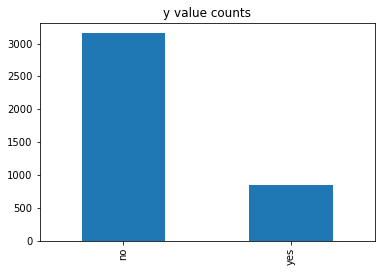

In [27]:
value_counts = file['y'].value_counts()

value_counts.plot.bar(title = 'y value counts')

<AxesSubplot:xlabel='y', ylabel='duration'>

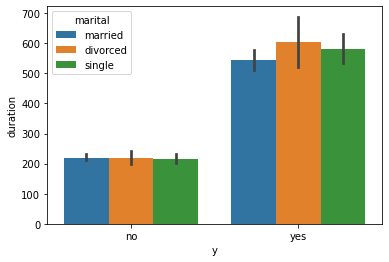

In [28]:
sns.barplot(x='y',y='duration',hue='marital',data=file)

<AxesSubplot:xlabel='y', ylabel='previous'>

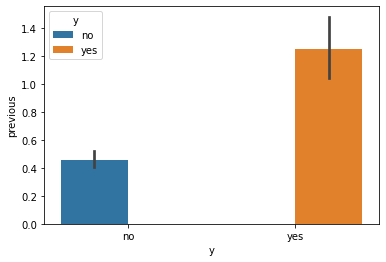

In [29]:
sns.barplot(x='y',y='previous', hue='y', data=file)

<AxesSubplot:xlabel='y', ylabel='balance'>

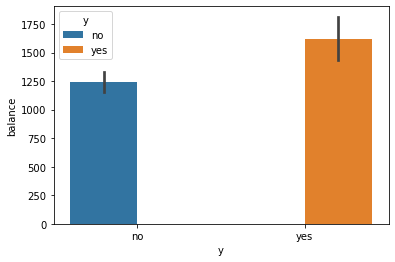

In [30]:
sns.barplot(x='y',y='balance', hue='y', data=file)

<AxesSubplot:title={'center':'Job and y'}>

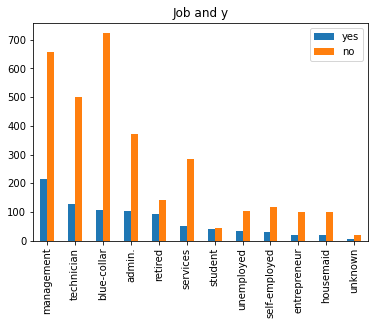

In [31]:
#job and y diagaram
import pandas as pd

df = pd.DataFrame()

df['yes'] = file[file['y'] == 'yes']['job'].value_counts()
df['no'] = file[file['y'] == 'no']['job'].value_counts()

df.plot.bar(title = 'Job and y')

In [32]:
from sklearn.preprocessing import StandardScaler

# Making new copy as df_new

df_new = file.copy()
df_new = df_new.drop('duration', axis=1)

scaler = StandardScaler()
num_cols = ['age', 'balance', 'day', 'campaign', 'pdays', 'previous']
df_new[num_cols] = scaler.fit_transform(df_new[num_cols])

df_new.head()


age           job  marital  education default   balance housing loan  \
0  0.150555    technician  married  secondary      no -0.393289      no   no   
1 -0.940586   blue-collar  married  secondary      no -0.604165     yes  yes   
2  0.241483  entrepreneur  married    primary      no -0.265653     yes   no   
3 -1.031514   blue-collar  married  secondary      no -0.379415     yes   no   
4 -0.485944    technician  married  secondary      no -0.352065     yes   no   

    contact       day  campaign     pdays  previous poutcome   y  
0  cellular  0.744239 -0.253361 -0.426703 -0.299485  unknown  no  
1  cellular -0.569879  1.358351 -0.426703 -0.299485  unknown  no  
2  cellular -1.167206 -0.253361 -0.426703 -0.299485  unknown  no  
3  cellular -1.525602 -0.575704 -0.426703 -0.299485  unknown  no  
4  cellular -0.569879  0.068981  2.123352  0.657718  failure  no

In [33]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',  'poutcome']

# Encoding categorical data
df_encoded = pd.DataFrame(encoder.fit_transform(df_new[cat_cols]))
df_encoded.columns = encoder.get_feature_names(cat_cols)

# Replacement
df_new = df_new.drop(cat_cols ,axis=1)
df_new = pd.concat([df_encoded, df_new], axis=1)

# Encoding
df_new['y'] = df_new['y'].apply(lambda x: 1 if x == 'yes' else 0)

print('Shape of dataframe:', df_new.shape)
df_new.head()

Shape of dataframe: (4000, 39)


job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  \
0         0.0              0.0               0.0            0.0   
1         0.0              1.0               0.0            0.0   
2         0.0              0.0               1.0            0.0   
3         0.0              1.0               0.0            0.0   
4         0.0              0.0               0.0            0.0   

   job_management  job_retired  job_self-employed  job_services  job_student  \
0             0.0          0.0                0.0           0.0          0.0   
1             0.0          0.0                0.0           0.0          0.0   
2             0.0          0.0                0.0           0.0          0.0   
3             0.0          0.0                0.0           0.0          0.0   
4             0.0          0.0                0.0           0.0          0.0   

   job_technician  ...  poutcome_other  poutcome_success  poutcome_unknown  \
0             1.0  ...             0.0               0.0               1.0   
1             0.0  ...             0.0               0.0               1.0   
2             0.0  ...             0.0               0.0               1.0   
3             0.0  ...             0.0               0.0               1.0   
4             1.0  ...             0.0               0.0               0.0   

        age   balance       day  campaign     pdays  previous  y  
0  0.150555 -0.393289  0.744239 -0.253361 -0.426703 -0.299485  0  
1 -0.940586 -0.604165 -0.569879  1.358351 -0.426703 -0.299485  0  
2  0.241483 -0.265653 -1.167206 -0.253361 -0.426703 -0.299485  0  
3 -1.031514 -0.379415 -1.525602 -0.575704 -0.426703 -0.299485  0  
4 -0.485944 -0.352065 -0.569879  0.068981  2.123352  0.657718  0  

[5 rows x 39 columns]

In [34]:
# Select Features
feature = df_new.drop('y', axis=1)

# Select Target
target = df_new['y']

# Training and Testing 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature , target, 
                                                    shuffle = True, 
                                                    test_size=0.2, 
                                                    random_state=1)

# Training and Testing

print('Shape of training feature', X_train.shape)
print('Shape of testing feature', X_test.shape)
print('Shape of training target', y_train.shape)
print('Shape of training target', y_test.shape)

Shape of training feature (3200, 38)
Shape of testing feature (800, 38)
Shape of training target (3200,)
Shape of training target (800,)


In [35]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predicting test data

    y_pred = model.predict(x_test)

    # Accuracy calculation

    accuracy_1 = metrics.accuracy_score(y_test, y_pred)

    recall = metrics.recall_score(y_test, y_pred)
   

    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

    return {'accuracy': accuracy_1,'recall': recall,  'confusion_matrix': confusion_matrix}

In [36]:
from sklearn import tree

# Decision Tree model creation 
DecTreeClass = tree.DecisionTreeClassifier(random_state=0)
DecTreeClass.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [37]:
# Model Evaluation
DecTreeClass_eval = evaluate_model(DecTreeClass, X_test, y_test)

#Result
print('Accuracy', DecTreeClass_eval['accuracy'])
print('Recall:', DecTreeClass_eval['recall'])
print('Confusion Matrix\n', DecTreeClass_eval['confusion_matrix'])

Accuracy 0.75875
Recall: 0.44654088050314467
Confusion Matrix
 [[536 105]
 [ 88  71]]


In [38]:
from sklearn.ensemble import RandomForestClassifier

# Building Random Forest model 

RandForest = RandomForestClassifier(random_state=0)
RandForest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [39]:
# Model evaluation
RandForest_eval = evaluate_model(RandForest, X_test, y_test)

# Print
print('Accuracy ', RandForest_eval['accuracy'])
print('Recall:', RandForest_eval['recall'])

print('Confusion Matrix \n', RandForest_eval['confusion_matrix'])

Accuracy  0.83625
Recall: 0.32075471698113206
Confusion Matrix 
 [[618  23]
 [108  51]]


In [40]:
from sklearn.naive_bayes import GaussianNB

# Naive Bayes model creation
nv = GaussianNB()
nv.fit(X_train, y_train)

GaussianNB()

In [41]:
# Model evaluation
nv_eval = evaluate_model(nv, X_test, y_test)

# Print
print('Accuracy:', nv_eval['accuracy'])
print('Recall:', nv_eval['recall'])

print('Confusion Matrix:\n', nv_eval['confusion_matrix'])

Accuracy: 0.765
Recall: 0.4088050314465409
Confusion Matrix:
 [[547  94]
 [ 94  65]]


In [42]:
from sklearn.neighbors import KNeighborsClassifier

#KNN model creation

KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [43]:
# Model Evaluation
KNN_eval = evaluate_model(KNN, X_test, y_test)

# Result printing
print('Accuracy:', KNN_eval['accuracy'])

print('Recall:', KNN_eval['recall'])

print('Confusion Matrix:\n', KNN_eval['confusion_matrix'])

Accuracy: 0.80875
Recall: 0.2830188679245283
Confusion Matrix:
 [[602  39]
 [114  45]]


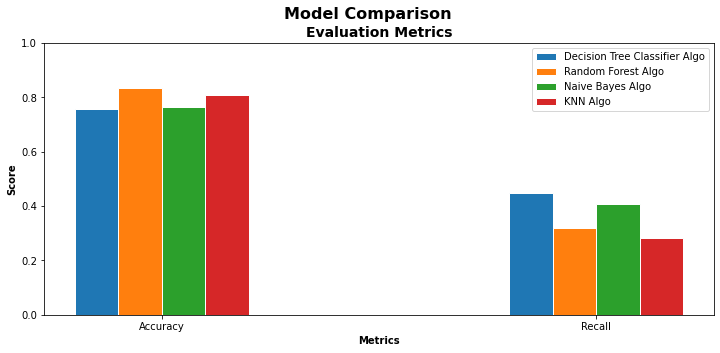

In [44]:
# Initialization

fig, (ax1) = plt.subplots(1, 1)

fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(5)
fig.set_figwidth(12)
fig.set_facecolor('white')


barWidth = 0.1
DecTreeClass_score = [DecTreeClass_eval['accuracy'], DecTreeClass_eval['recall']]
RandForest_score = [RandForest_eval['accuracy'], RandForest_eval['recall']]
nv_score = [nv_eval['accuracy'],nv_eval['recall']]
KNN_score = [KNN_eval['accuracy'], KNN_eval['recall'] ]


a1 = np.arange(len(DecTreeClass_score))
a2 = [x + barWidth for x in a1]
a3 = [x + barWidth for x in a2]
a4 = [x + barWidth for x in a3]

## Plot creation
ax1.bar(a1, DecTreeClass_score, width=barWidth, edgecolor='white', label='Decision Tree Classifier Algo')
ax1.bar(a2, RandForest_score, width=barWidth, edgecolor='white', label='Random Forest Algo')
ax1.bar(a3, nv_score, width=barWidth, edgecolor='white', label='Naive Bayes Algo')
ax1.bar(a4, KNN_score, width=barWidth, edgecolor='white', label='KNN Algo')


ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Recall']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(DecTreeClass_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)


ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()



plt.show()

In [45]:
from sklearn.model_selection import GridSearchCV

# Grid creation

param_grid = {
    'max_depth': [50, 80, 100],
    'max_features': [2, 3, 4],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 300, 500]
}

# Base Model
RandForest_grids = RandomForestClassifier(random_state=0)

grid_search = GridSearchCV(estimator=RandForest_grids, param_grid=param_grid, scoring='recall',
                           cv=5, n_jobs=-1, verbose=2)

# Fitting
grid_search.fit(X_train, y_train)

grid_search.best_params_

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


{'max_depth': 50,
 'max_features': 4,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 300}

In [46]:
# Best fit model selection
best_grid = grid_search.best_estimator_

# Model Evaluation
best_grid_eval = evaluate_model(best_grid, X_test, y_test)

# Print
print('Accuracy ', best_grid_eval['accuracy'])
print('recall ', best_grid_eval['recall'])

print('Confusion Matrix \n', best_grid_eval['confusion_matrix'])

Accuracy  0.83
recall  0.22012578616352202
Confusion Matrix 
 [[629  12]
 [124  35]]


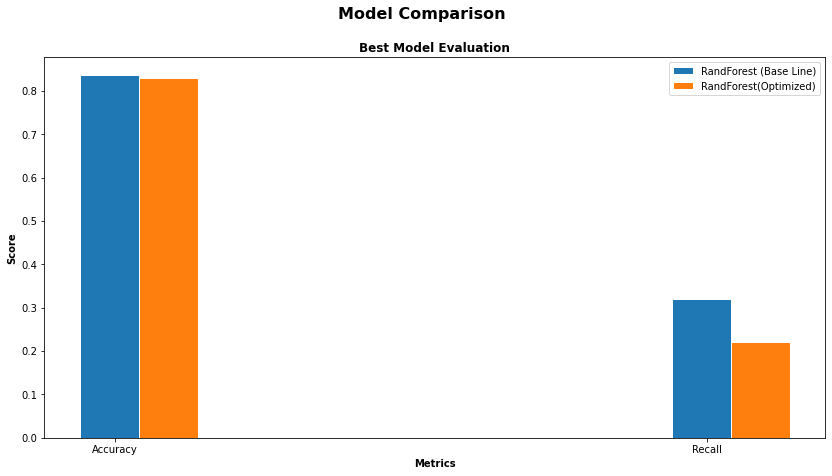

Change of -0.75% on accuracy.
Change of -31.37% on recall.


In [47]:
# Intitialization
fig, (ax1) = plt.subplots(1, 1)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

barWidth = 0.1
RandForest_score = [RandForest_eval['accuracy'],RandForest_eval['recall'] ]
best_grid_score = [best_grid_eval['accuracy'], best_grid_eval['recall']]

r1 = np.arange(len(RandForest_score))
r2 = [x + barWidth for x in r1]

## Plotting
ax1.bar(r1, RandForest_score, width=barWidth, edgecolor='white', label='RandForest (Base Line)')
ax1.bar(r2, best_grid_score, width=barWidth, edgecolor='white', label='RandForest(Optimized)')

ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Recall']
ax1.set_xticks([r + (barWidth * 0.1) for r in range(len(RandForest_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')


## Legend creation and graphic presentation
ax1.set_title('Best Model Evaluation', fontsize=12, fontweight='bold')
ax1.legend()


plt.show()

print('Change of {:0.2f}% on accuracy.'.format(100 * ((best_grid_eval['accuracy'] - RandForest_eval['accuracy']) / RandForest_eval['accuracy'])))
print('Change of {:0.2f}% on recall.'.format(100 * ((best_grid_eval['recall'] - RandForest_eval['recall']) / RandForest_eval['recall'])))


In [48]:
file['target'] = RandForest.predict(feature)
file['target'] = file['target'].apply(lambda x: 'yes' if x==0 else 'no')

file.to_csv('target.csv', index=False)

file.head(10)

age           job   marital  education default  balance housing loan  \
0   43    technician   married  secondary      no      328      no   no   
1   31   blue-collar   married  secondary      no     -204     yes  yes   
2   44  entrepreneur   married    primary      no      650     yes   no   
3   30   blue-collar   married  secondary      no      363     yes   no   
4   36    technician   married  secondary      no      432     yes   no   
5   45    technician  divorced  secondary      no      167      no   no   
6   48   blue-collar  divorced    primary      no       24     yes   no   
7   37   blue-collar   married  secondary      no      342     yes   no   
8   53    technician  divorced  secondary      no      392     yes   no   
9   59       unknown   married    unknown      no     3940      no   no   

    contact  day  duration  campaign  pdays  previous poutcome    y target  
0  cellular   22        79         2     -1         0  unknown   no    yes  
1  cellular   11       429         7     -1         0  unknown   no    yes  
2  cellular    6       142         2     -1         0  unknown   no    yes  
3  cellular    3       165         1     -1         0  unknown   no    yes  
4  cellular   11        61         3    255         2  failure   no    yes  
5  cellular   30        97        11     -1         0  unknown   no    yes  
6   unknown   14       832         1     -1         0  unknown  yes    yes  
7  cellular   12       340         2    175         1  failure   no    yes  
8  cellular   28        70         1    245         1  failure   no    yes  
9   unknown    5        48         2     -1         0  unknown   no    yes